In [10]:
import pandas as pd
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, recall_score, make_scorer
from imblearn.over_sampling import SMOTE

In [11]:
import sqlite3
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('creditcard.csv')

# Remove the double quotes from the column names
df.columns = df.columns.str.replace('"', '')

# Establish a connection to an SQLite database and create a cursor
conn = sqlite3.connect('creditcard.db')
cursor = conn.cursor()

# Drop table if it already exists
cursor.execute('''DROP TABLE IF EXISTS creditcard''')

# Check if the table exists
cursor.execute('''SELECT name FROM sqlite_master WHERE type='table' AND name='creditcard' ''')
table_exists = cursor.fetchone()

# Create a table in the database to store the data if it doesn't exist
if not table_exists:
    cursor.execute('''CREATE TABLE creditcard (
                    Time INTEGER, V1 TEXT, V2 TEXT, V3 TEXT, V4 TEXT, V5 TEXT, V6 TEXT, V7 TEXT, V8 TEXT, V9 TEXT,
                    V10 TEXT, V11 TEXT, V12 TEXT, V13 TEXT, V14 TEXT, V15 TEXT, V16 TEXT, V17 TEXT, V18 TEXT,
                    V19 TEXT, V20 TEXT, V21 TEXT, V22 TEXT, V23 TEXT, V24 TEXT, V25 TEXT, V26 TEXT, V27 TEXT,
                    V28 TEXT, Amount TEXT, Class INTEGER
                    )''')

# Insert the data from the DataFrame into the database table
for _, row in df.iterrows():
    cursor.execute('''INSERT INTO creditcard VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)''',
                   tuple(row))

# Commit the changes and close the cursor and the database connection
conn.commit()
cursor.close()
conn.close()


In [12]:
# Establish a connection to the SQLite database
conn = sqlite3.connect('creditcard.db')

# Query the database to select all rows from the creditcard table
query = "SELECT * FROM creditcard"
data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
1,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.0089830991432281,0.0147241691924927,2.69,0
2,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
3,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.0052735967825345,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0
4,2,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.0094306971323291,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


In [13]:
# Establish a connection to the SQLite database
conn = sqlite3.connect('creditcard.db')

# Query the database to get the total count of rows in the creditcard table
query = "SELECT COUNT(*) AS TotalCount FROM creditcard"
result = conn.execute(query).fetchone()

# Close the database connection
conn.close()

# Extract the total count from the result
total_count = result[0]

# Print the total count
print("Total Count:", total_count)

Total Count: 284807


In [14]:
data = data.drop_duplicates()
num_rows = data.shape[0]
print("Number of rows:", num_rows)

Number of rows: 283726


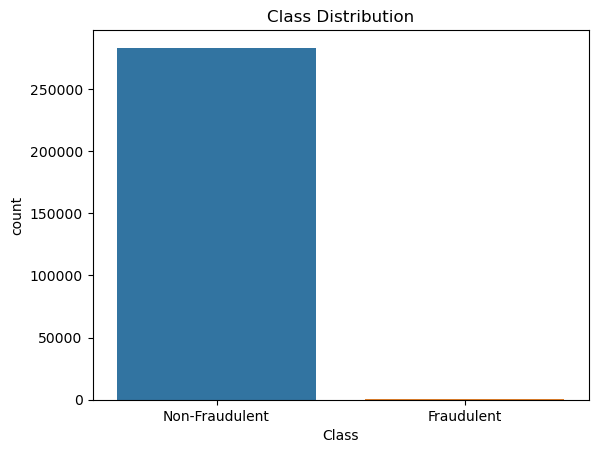

In [15]:
# sns.countplot to visualize the class distribution, showing the number of fraudulent and non-fraudulent transactions.
# Class 0 =  Non-Fraudulent and 1 = Fraudulent
# Perform Exploratory Data Analysis (EDA)
# Check the distribution of 'Class'
sns.countplot(x='Class', data=data)
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])  # Set x-axis labels
plt.title('Class Distribution')
plt.show()